# **TELCO CUSTOMER CHURN ANALYSIS: DEMOGRAPHY & GEOGRAPHY**
### **Created By : [Hashfi Putraza Hikmat]**

## **1. BUSINESS PROBLEM UNDERSTANDING**

**Context**
Sebuah perusahaan telekomunikasi fiksi ingin memahami pola *churn* (berhenti berlangganan) dari pelanggannya. Dataset ini mencakup berbagai informasi, namun analisis ini difokuskan secara spesifik pada aspek **Demografi** (profil pelanggan) dan **Geografi** (lokasi tempat tinggal). Memahami profil pelanggan yang berisiko pergi sangat penting untuk menjaga keberlangsungan bisnis.

**Problem Statement :**
Biaya untuk mendapatkan pelanggan baru (akuisisi) jauh lebih tinggi daripada biaya untuk mempertahankan pelanggan lama. Perusahaan kesulitan mengidentifikasi segmen pelanggan mana (Siapa dan Di mana) yang paling rentan meninggalkan layanan. Tanpa wawasan ini, strategi retensi menjadi tidak tepat sasaran.

**Goals :**
Menganalisis faktor-faktor **Demografi** dan **Geografi** yang mempengaruhi keputusan pelanggan untuk *churn*. Hasil analisis ini akan digunakan untuk memberikan rekomendasi strategi pemasaran yang dipersonalisasi berdasarkan segmen pelanggan dan lokasi wilayah.

**Analytic Approach :**
Kita akan melakukan *Exploratory Data Analysis* (EDA) mendalam, meliputi analisis distribusi demografis, korelasi kepuasan pelanggan, serta pemetaan geospasial menggunakan peta interaktif untuk melihat titik penyebaran churn.

## **2. PREPARATION**

### **Import Library**

In [43]:
# Data Manipulation
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap, FastMarkerCluster

# Settings
pd.set_option('display.max_columns', None)
sns.set_theme(style='whitegrid')
import warnings
warnings.filterwarnings('ignore')

### **Load Dataset**

In [44]:
# Load Dataset
base_dir = "D:\PENTING\Purwadhika\Job Connector Data Science\Materials\Final project\Dataset\\"
path = base_dir + "cleanfinprofix_data.csv"
df = pd.read_csv(path)

# Menampilkan 5 baris pertama data
df.head()

,age,avgmonthlygbdownload,avgmonthlylongdistancecharges,cltv,churncategory,churnreason,churnscore,churn,city,contract,dependents,deviceprotection,internetservice,latitude,longitude,monthlycharges,multiplelines,numberofreferrals,onlinebackup,onlinesecurity,paperlessbilling,partner,paymentmethod,phoneservice,population,referredafriend,satisfactionscore,seniorcitizen,streamingmusic,streamingmovies,streamingtv,techsupport,totalextradatacharges,totallongdistancecharges,totalrefunds,totalrevenue,totalcharges,unlimiteddata,zipcode,customerid,gender,tenure
0,37,16,42.39,2205,No Churn,No Churn,65,No,Frazier Park,One year,Yes,No,DSL,34.827662,-118.999073,65.6,No,2,Yes,No,Yes,Yes,Mailed check,Yes,4498,1,3,0,0,No,Yes,Yes,0,381.51,0.00,974.81,593.30,1,93225,0002-ORFBO,Female,9
1,46,10,10.69,5414,No Churn,No Churn,66,No,Glendale,Month-to-month,No,No,DSL,34.162515,-118.203869,59.9,Yes,0,No,No,No,No,Mailed check,Yes,31297,0,5,0,1,Yes,No,No,10,96.21,38.33,610.28,542.40,0,91206,0003-MKNFE,Male,9
2,50,30,33.65,4479,Competitor,Competitor had better devices,71,Yes,Costa Mesa,Month-to-month,No,Yes,Fiber optic,33.645672,-117.922613,73.9,No,0,No,No,Yes,No,Electronic check,Yes,62069,0,1,0,0,No,No,No,0,134.60,0.00,415.45,280.85,1,92627,0004-TLHLJ,Male,4
3,78,4,27.82,3714,Dissatisfaction,Product dissatisfaction,91,Yes,Martinez,Month-to-month,No,Yes,Fiber optic,38.014457,-122.115432,98.0,No,1,Yes,No,Yes,Yes,Electronic check,Yes,46677,1,1,1,0,Yes,Yes,No,0,361.66,0.00,1599.51,1237.85,1,94553,0011-IGKFF,Male,13
4,75,11,7.38,3464,Dissatisfaction,Network reliability,68,Yes,Camarillo,Month-to-month,No,No,Fiber optic,34.227846,-119.079903,83.9,No,3,No,No,Yes,Yes,Mailed check,Yes,42853,1,1,1,0,No,Yes,Yes,0,22.14,0.00,289.54,267.40,1,93010,0013-EXCHZ,Female,3


## **3. DATA UNDERSTANDING & PROFILING**
Tahap ini bertujuan untuk memahami struktur data dan mengecek tipe data.

In [45]:
# Cek statistik deskriptif
display(df.describe())

,age,avgmonthlygbdownload,avgmonthlylongdistancecharges,cltv,churnscore,latitude,longitude,monthlycharges,numberofreferrals,population,referredafriend,satisfactionscore,seniorcitizen,streamingmusic,totalextradatacharges,totallongdistancecharges,totalrefunds,totalrevenue,totalcharges,unlimiteddata,zipcode,tenure
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,20.515405,22.958954,4400.295755,58.505040,36.197455,-119.756684,64.761692,1.951867,22139.603294,0.457476,3.244924,0.162147,0.353259,6.860713,749.099262,1.962182,3034.379056,2279.734304,0.673719,93486.070567,32.371149
std,16.750352,20.418940,15.448113,1183.057152,21.170031,2.468929,2.154425,30.090047,3.001199,21152.392837,0.498224,1.201657,0.368612,0.478016,25.104978,846.660055,7.902614,2865.204542,2266.794470,0.468885,1856.767505,24.559481
min,19.000000,0.000000,0.000000,2003.000000,5.000000,32.555828,-124.301372,18.250000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.360000,0.000000,0.000000,90001.000000,0.000000
25%,32.000000,3.000000,9.210000,3469.000000,40.000000,33.990646,-121.788090,35.500000,0.000000,2344.000000,0.000000,3.000000,0.000000,0.000000,0.000000,70.545000,0.000000,605.610000,398.550000,0.000000,92101.000000,9.000000
50%,46.000000,17.000000,22.890000,4527.000000,61.000000,36.205465,-119.595293,70.350000,0.000000,17554.000000,0.000000,3.000000,0.000000,0.000000,0.000000,401.440000,0.000000,2108.640000,1394.550000,1.000000,93518.000000,29.000000
75%,60.000000,27.000000,36.395000,5380.500000,75.500000,38.161321,-117.969795,89.850000,3.000000,36125.000000,1.000000,4.000000,0.000000,1.000000,0.000000,1191.100000,0.000000,4801.145000,3786.600000,1.000000,95329.000000,55.000000
max,80.000000,85.000000,49.990000,6500.000000,96.000000,41.962127,-114.192901,118.750000,11.000000,105285.000000,1.000000,5.000000,1.000000,1.000000,150.000000,3564.720000,49.790000,11979.340000,8684.800000,1.000000,96150.000000,72.000000


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 42 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            7043 non-null   int64  
 1   avgmonthlygbdownload           7043 non-null   int64  
 2   avgmonthlylongdistancecharges  7043 non-null   float64
 3   cltv                           7043 non-null   int64  
 4   churncategory                  7043 non-null   object 
 5   churnreason                    7043 non-null   object 
 6   churnscore                     7043 non-null   int64  
 7   churn                          7043 non-null   object 
 8   city                           7043 non-null   object 
 9   contract                       7043 non-null   object 
 10  dependents                     7043 non-null   object 
 11  deviceprotection               7043 non-null   object 
 12  internetservice                7043 non-null   o

## **4. EXPLORATORY DATA ANALYSIS (EDA)**

Fokus analisis ini dibagi menjadi dua aspek utama:
1. **Demografi**: Siapa pelanggannya?
2. **Geografi**: Di mana mereka tinggal?

### **A. ANALISIS DEMOGRAFI**
Kita akan melihat profil pelanggan berdasarkan Gender, Lansia, Pasangan, Tanggungan, dan Kepuasan.

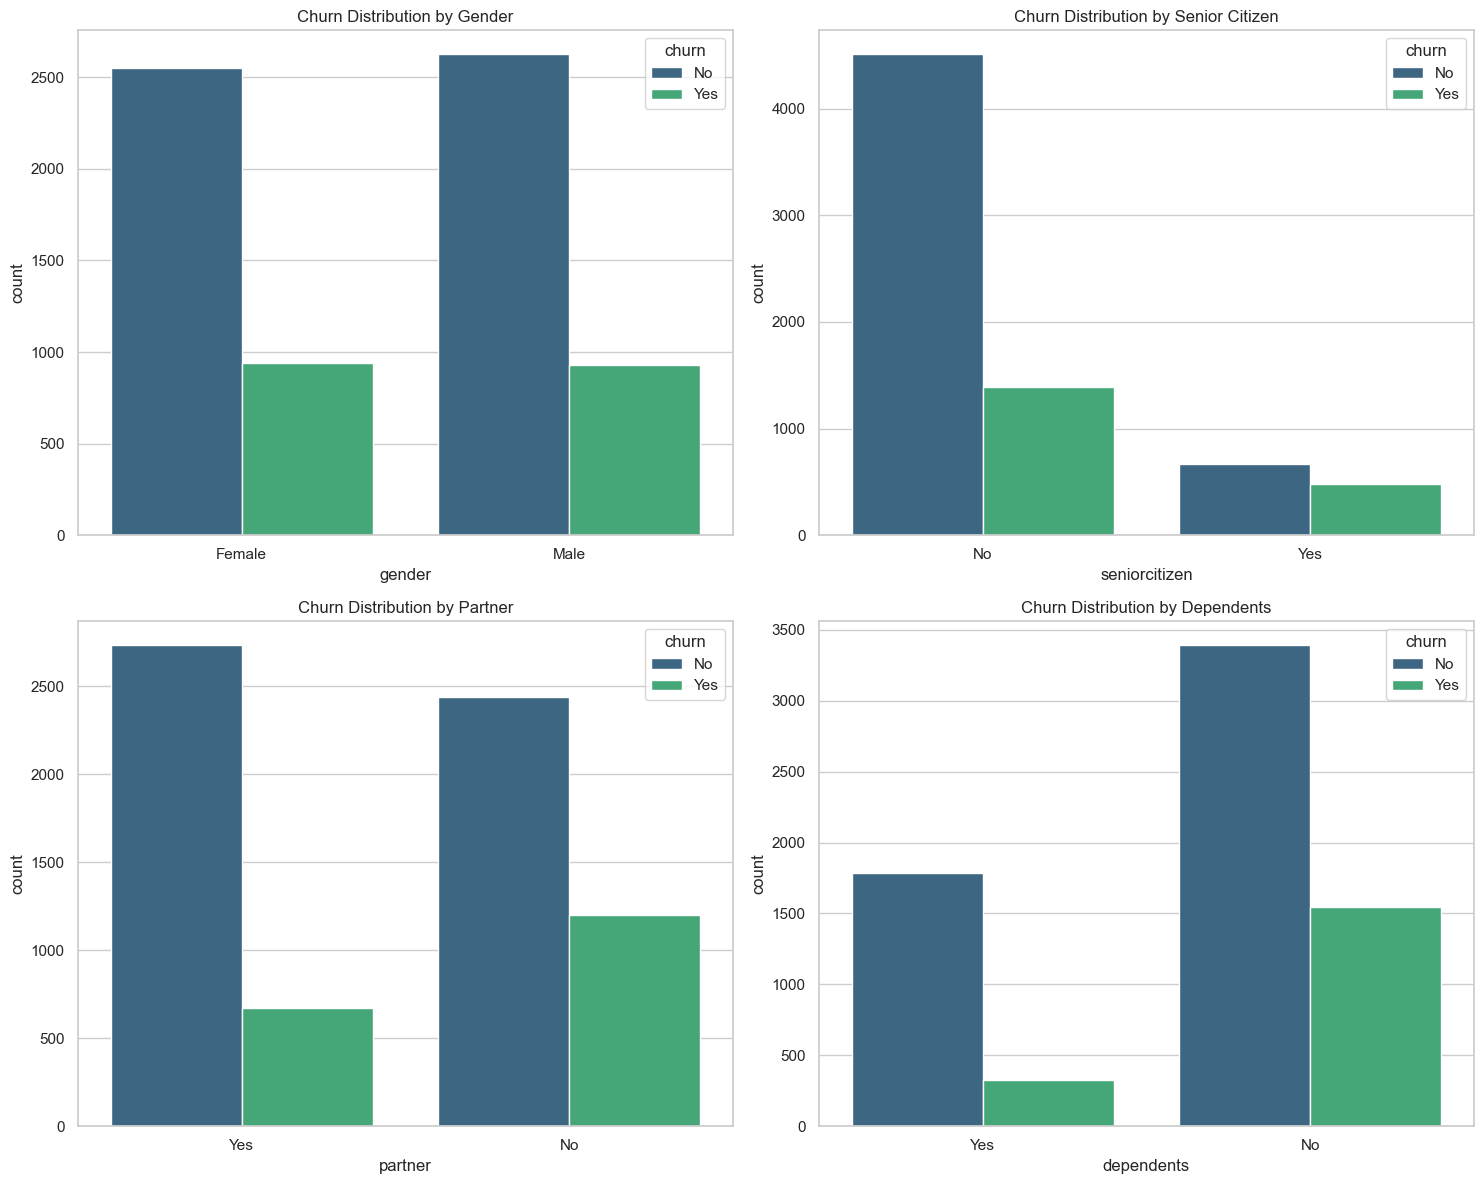

In [47]:
# Menyiapkan canvas visualisasi
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Gender
sns.countplot(x='gender', hue='churn', data=df, ax=axes[0,0], palette='viridis')
axes[0,0].set_title('Churn Distribution by Gender')

# Plot 2: Senior Citizen
sns.countplot(x='seniorcitizen', hue='churn', data=df, ax=axes[0,1], palette='viridis')
axes[0,1].set_title('Churn Distribution by Senior Citizen')
axes[0,1].set_xticklabels(['No', 'Yes'])

# Plot 3: Partner
sns.countplot(x='partner', hue='churn', data=df, ax=axes[1,0], palette='viridis')
axes[1,0].set_title('Churn Distribution by Partner')

# Plot 4: Dependents
sns.countplot(x='dependents', hue='churn', data=df, ax=axes[1,1], palette='viridis')
axes[1,1].set_title('Churn Distribution by Dependents')

plt.tight_layout()
plt.show()

### **Insight Demografi (Kategorikal):**
1. **Gender:** Tidak ada perbedaan signifikan antara pria dan wanita dalam hal churn. Keduanya memiliki tingkat churn yang hampir sama. Ini menunjukkan bahwa gender bukan faktor penentu utama.
2. **Senior Citizen:** Kelompok Lansia (*Senior Citizen*) memiliki rasio churn yang jauh lebih tinggi dibandingkan kelompok muda. Ini mengindikasikan bahwa pelanggan lansia mungkin merasa kurang nyaman dengan layanan atau teknologi yang ditawarkan, atau mereka lebih sensitif terhadap harga/kompetitor.
3. **Partner & Dependents:** Pelanggan yang **Single** (tidak punya partner) dan **Tanpa Tanggungan** (*No Dependents*) adalah kelompok yang paling rentan untuk pergi (*Churn*). Pelanggan yang berkeluarga cenderung lebih setia (*loyal*), mungkin karena faktor stabilitas atau keengganan untuk memindahkan layanan satu keluarga.

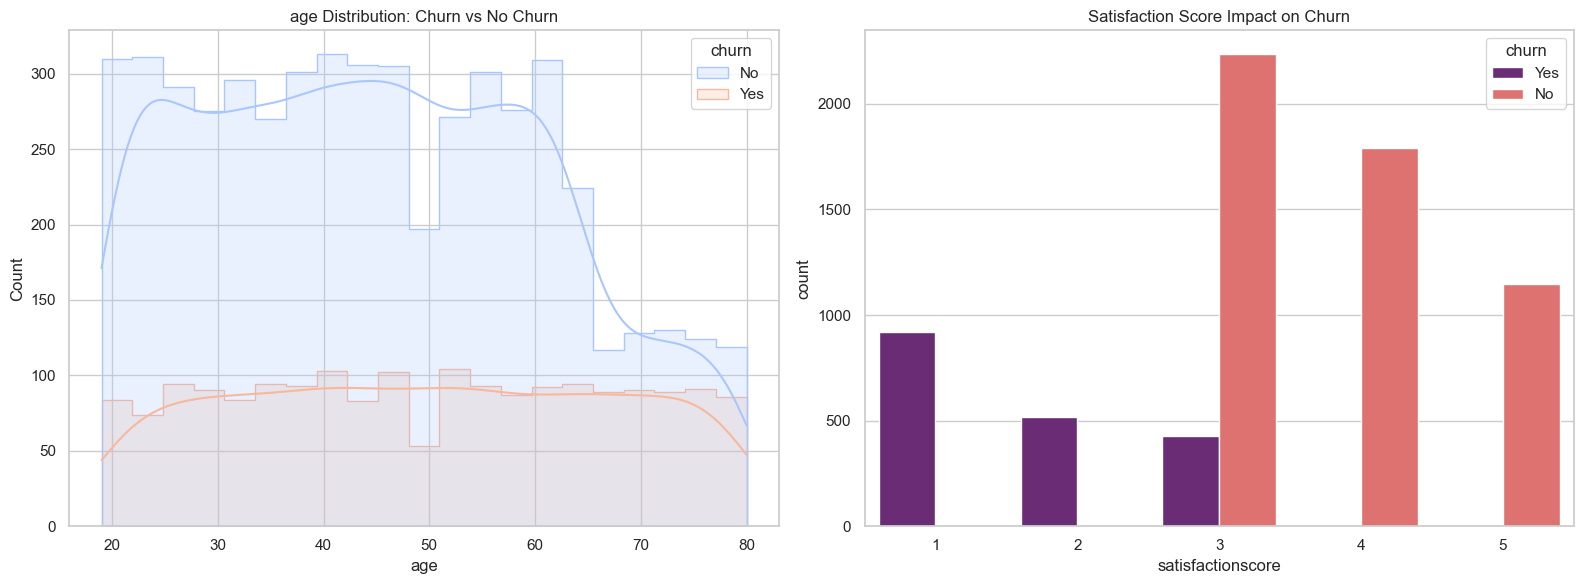

In [48]:
# Analisis Distribusi Umur (Age) dan Kepuasan (Satisfaction Score)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot Umur
sns.histplot(data=df, x='age', hue='churn', kde=True, element="step", ax=axes[0], palette='coolwarm')
axes[0].set_title('age Distribution: Churn vs No Churn')

# Plot Satisfaction Score
sns.countplot(x='satisfactionscore', hue='churn', data=df, ax=axes[1], palette='magma')
axes[1].set_title('Satisfaction Score Impact on Churn')

plt.tight_layout()
plt.show()

### **Insight Demografi (Numerikal):**
1. **Age (Umur):** Terlihat adanya peningkatan tren churn pada usia lanjut (di atas 60 tahun), yang sejalan dengan temuan pada variabel *Senior Citizen*.
2. **Satisfaction Score:** Ini adalah indikator yang sangat kuat.
   * Hampir **semua** pelanggan yang churn memberikan skor kepuasan rendah (1, 2, atau 3).
   * Pelanggan yang memberikan skor 4 dan 5 sangat jarang yang melakukan churn.
   * **Actionable Insight:** Tim CS harus segera memantau pelanggan yang memberikan rating 3 ke bawah karena mereka berada di "Zona Bahaya".

### **B. ANALISIS GEOGRAFI**
Analisis ini bertujuan untuk menemukan lokasi spesifik dengan tingkat churn tinggi.

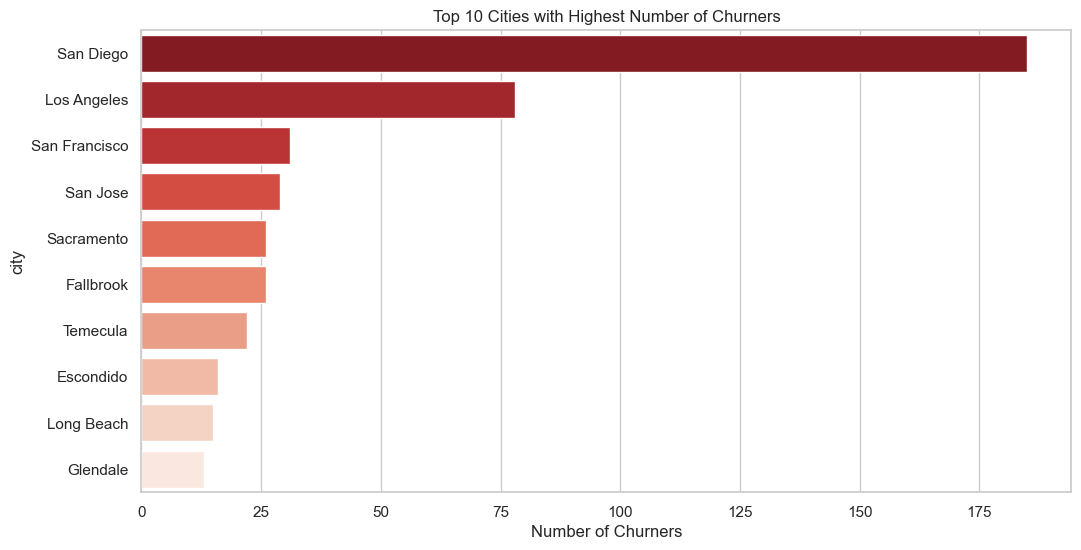

In [49]:
# Mengambil Top 10 Kota dengan Jumlah Churn Tertinggi
top_churn_city = df[df['churn'] == 'Yes']['city'].value_counts().head(10).reset_index()
top_churn_city.columns = ['city', 'Churn_Count']

plt.figure(figsize=(12, 6))
sns.barplot(x='Churn_Count', y='city', data=top_churn_city, palette='Reds_r')
plt.title('Top 10 Cities with Highest Number of Churners')
plt.xlabel('Number of Churners')
plt.show()

### **Insight Kota (Top Cities):**
* **San Diego** menjadi kota dengan jumlah pelanggan churn terbanyak, diikuti oleh Los Angeles.
* Meskipun Los Angeles memiliki populasi besar, tingginya angka churn di San Diego (yang secara populasi lebih kecil dari LA) adalah anomali yang perlu diperhatikan.

In [50]:
# Menyiapkan Peta Folium
# Fokus pada koordinat rata-rata California
map_center = [df['latitude'].mean(), df['longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=6, tiles="OpenStreetMap")

# Filter data hanya untuk pelanggan yang CHURN (Yes)
# Kita ingin melihat di mana 'titik panas' pelanggan yang pergi
churn_data = df[df['churn'] == 'Yes'][['latitude', 'longitude']]

# Menambahkan HeatMap layer
# HeatMap akan menunjukkan area berwarna merah pekat dimana banyak pelanggan melakukan Churn
HeatMap(data=churn_data, radius=10, blur=15, max_zoom=1).add_to(m)

# Menambahkan Cluster Marker untuk melihat detail jumlah per area jika di-zoom
FastMarkerCluster(data=churn_data).add_to(m)

# Menampilkan Peta
m

### **Insight Peta Geografis (California Map):**
* **Konsentrasi Churn:** Melalui *Heatmap*, terlihat jelas bahwa "zona merah" (konsentrasi churn tertinggi) berpusat di area **Southern California**, khususnya di sekitar **San Diego** dan area metropolitan **Los Angeles**.
* **Area San Francisco:** Area Bay Area (San Francisco/San Jose) juga menunjukkan titik panas, namun tidak sepadat area selatan.
* **Rekomendasi:** Audit jaringan dan kompetitor harus diprioritaskan di area San Diego dan LA Selatan karena di sanalah "pendarahan" pelanggan terbesar terjadi.

## **5. KESIMPULAN & REKOMENDASI**

### **Kesimpulan Analisis**
Berdasarkan analisis Demografi dan Geografi, profil pelanggan yang paling berisiko *Churn* adalah:
1. **Lansia (Senior Citizen)**: Usia > 60 tahun.
2. **Hidup Sendiri**: Tidak memiliki pasangan dan tidak memiliki tanggungan.
3. **Lokasi**: Tinggal di area **San Diego** dan **Los Angeles**.
4. **Kepuasan**: Memberikan skor kepuasan 1-3.

### **Rekomendasi Bisnis**
1. **Program "Silver Support"**: Buat layanan pelanggan prioritas untuk lansia yang lebih humanis (bukan bot), karena mereka rentan churn.
2. **Bundling Keluarga**: Tawarkan promo agresif untuk paket keluarga kepada pelanggan *Single* agar mereka mengajak keluarga bergabung (meningkatkan *stickiness*).
3. **Investigasi San Diego**: Kirim tim lapangan ke San Diego untuk mengecek kualitas sinyal atau promo kompetitor, karena area ini adalah penyumbang churn terbesar secara tidak wajar.